In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data01.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df=df.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null int64
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [11]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_s=ss.fit_transform(df)

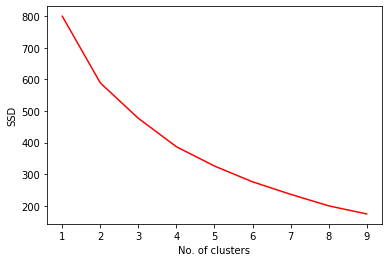

In [14]:
from sklearn.cluster import KMeans
kmeans=KMeans()

ssd=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df_s)
    
    ssd.append(kmeans.inertia_)

plt.plot(range(1,10),ssd,'r')
plt.xlabel('No. of clusters')
plt.ylabel('SSD')
plt.show()

In [15]:
ssd

[800.0,
 588.8026767824936,
 476.77320656076427,
 386.82842558376666,
 325.71329196023186,
 275.7952868566267,
 236.25761095237863,
 199.7166255966767,
 174.1249392159928]

In [20]:
import plusmodules as pm

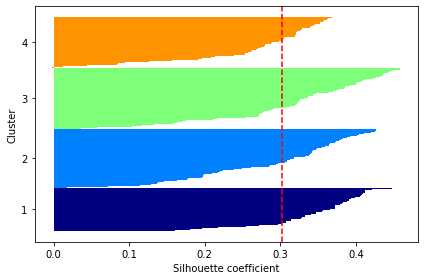

In [21]:
pm.svisualizer(df_s,4)
plt.show()

In [22]:
## Based on SSD values, sihouette coeffecient and elbow graph, the ideal value of k is 4.

In [16]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [17]:
df['cluster']=kmeans.labels_

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,2
3,1,23,16,77,1
4,1,31,17,40,2


In [19]:
df['cluster'].value_counts()

2    56
1    56
0    48
3    40
Name: cluster, dtype: int64

### Insights

In [32]:
df.groupby('cluster').agg('mean')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.0,49.437500,62.416667,29.208333
1,1.0,28.392857,60.428571,68.178571
2,1.0,47.803571,58.071429,34.875000
3,0.0,28.250000,62.000000,71.675000


In [ ]:
# Group 0 - Middle Aged men with an annual income of 62K$ have the lowest spending score of 29
# Group 2 - Middle Aged women with an innual income of 58K$ have the next higher spending score of 35
# Group 1 - Youth(Women) with average age of 28 with average income of 60K$ have high spending score of 68
# Group 3 - Youth(Men) with average age of 28 and average income of 62k$ have the highest spending score of 72

# Men and Women of lesser age(1,3) seem to have almost double the spending score when compared to Middle aged group(0,2)
# even though there is no significant difference in their annual income.

### KNN

In [27]:
x=df.drop(columns='cluster',axis=1)
y=df['cluster']

In [28]:
from sklearn.model_selection import train_test_split

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(df_s, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model = model.fit(df_s, y)

In [30]:
y_pred = model.predict(df_s)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.995